In [1]:
!python --version

Python 3.8.0


# Package to install
!pip install rasterio
!pip install rioxarray
!pip install geopandas
!pip install earthpy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import rasterio
import rioxarray as rxr
import geopandas as gpd
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
from matplotlib.colors import ListedColormap

In [2]:
# Show true color img
img = plt.imread(r"C:\Users\User\OneDrive - Engenuity (Pvt) Ltd\SPE\NDVI\Data\cloud\2022-07-19-00_00_2022-07-19-23_59_Sentinel-2_L2A_True_color.tiff")
plt.imshow(img)
plt.show()

UnidentifiedImageError: cannot identify image file 'C:\\Users\\User\\OneDrive - Engenuity (Pvt) Ltd\\SPE\\NDVI\\Data\\cloud\\2022-07-19-00_00_2022-07-19-23_59_Sentinel-2_L2A_True_color.tiff'

In [3]:
red_file = rxr.open_rasterio(r"C:\Users\User\OneDrive - Engenuity (Pvt) Ltd\SPE\NDVI\Data\cloud\2022-07-19-00_00_2022-07-19-23_59_Sentinel-2_L2A_B04_(Raw).tiff")
nir_file = rxr.open_rasterio(r"C:\Users\User\OneDrive - Engenuity (Pvt) Ltd\SPE\NDVI\Data\cloud\2022-07-19-00_00_2022-07-19-23_59_Sentinel-2_L2A_B08_(Raw).tiff")
print(red_file.shape)
print(nir_file.shape)

(1, 19, 63)
(1, 19, 63)


In [4]:
ndvi = es.normalized_diff(nir_file[0], red_file[0])

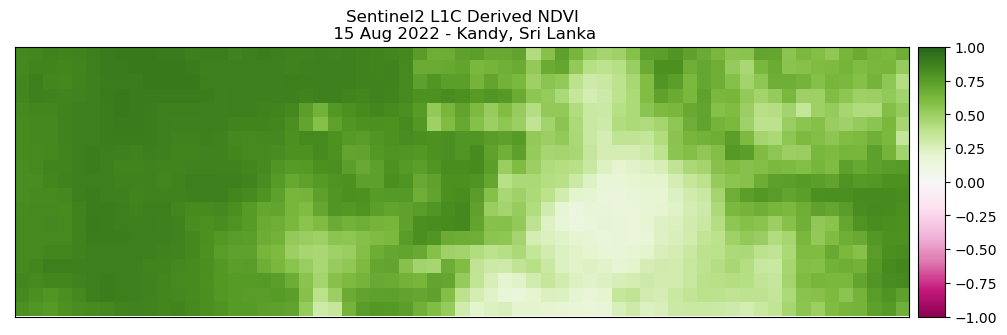

In [5]:
ep.plot_bands(ndvi,
              cmap='PiYG',
              scale=False,
              vmin=-1, vmax=1,
              title="Sentinel2 L1C Derived NDVI\n 15 Aug 2022 - Kandy, Sri Lanka")
plt.show()

In [6]:
# Create classes and apply to NDVI results
ndvi_class_bins = [-np.inf, 0, 0.1, 0.25, 0.4, np.inf]
ndvi_landsat_class = np.digitize(ndvi, ndvi_class_bins)

# Apply the nodata mask to the newly classified NDVI data
ndvi_landsat_class = np.ma.masked_where(
    np.ma.getmask(ndvi), ndvi_landsat_class
)
np.unique(ndvi_landsat_class)

masked_array(data=[3, 4, 5],
             mask=False,
       fill_value=999999,
            dtype=int64)

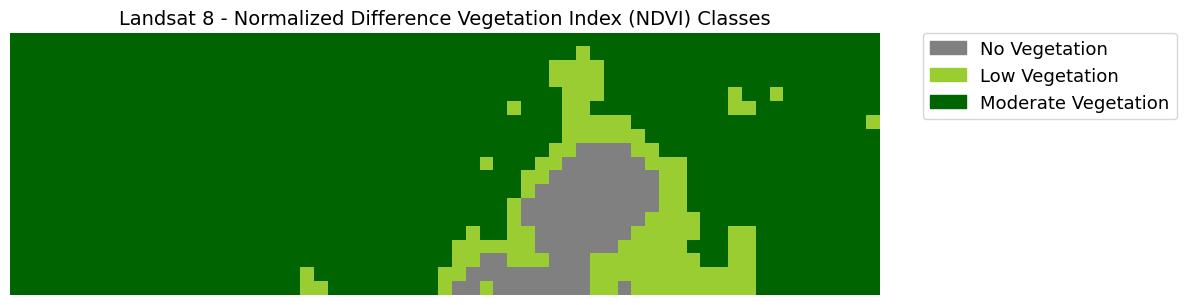

In [9]:
# Define color map
nbr_colors = ["gray", "y", "yellowgreen", "g", "darkgreen"]
nbr_cmap = ListedColormap(nbr_colors)

# Define class names
ndvi_cat_names = [
    "No Vegetation",
    #"Bare Area",
    "Low Vegetation",
    "Moderate Vegetation",
    #"High Vegetation",
]

# Get list of classes
classes = np.unique(ndvi_landsat_class)
classes = classes.tolist()
# The mask returns a value of none in the classes. remove that
classes = classes[0:5]

# Plot your data
fig, ax = plt.subplots(figsize=(12, 12))
im = ax.imshow(ndvi_landsat_class, cmap=nbr_cmap)

ep.draw_legend(im_ax=im, classes=classes, titles=ndvi_cat_names)
ax.set_title(
    "Landsat 8 - Normalized Difference Vegetation Index (NDVI) Classes",
    fontsize=14,
)
ax.set_axis_off()

# Auto adjust subplot to fit figure size
plt.tight_layout()

#Counting the Number of pixels

In [47]:
# Create classes and apply to NDVI results
ndvi_class_bins = [-np.inf, 0.6, np.inf]
ndvi_landsat_class = np.digitize(ndvi, ndvi_class_bins)

# Apply the nodata mask to the newly classified NDVI data
ndvi_landsat_class = np.ma.masked_where(
    np.ma.getmask(ndvi), ndvi_landsat_class
)
np.unique(ndvi_landsat_class)

masked_array(data=[1, 2, --],
             mask=[False, False,  True],
       fill_value=999999,
            dtype=int64)

ValueError: The number of classes should equal the number of titles. You have provided 2 classes and 3 titles.

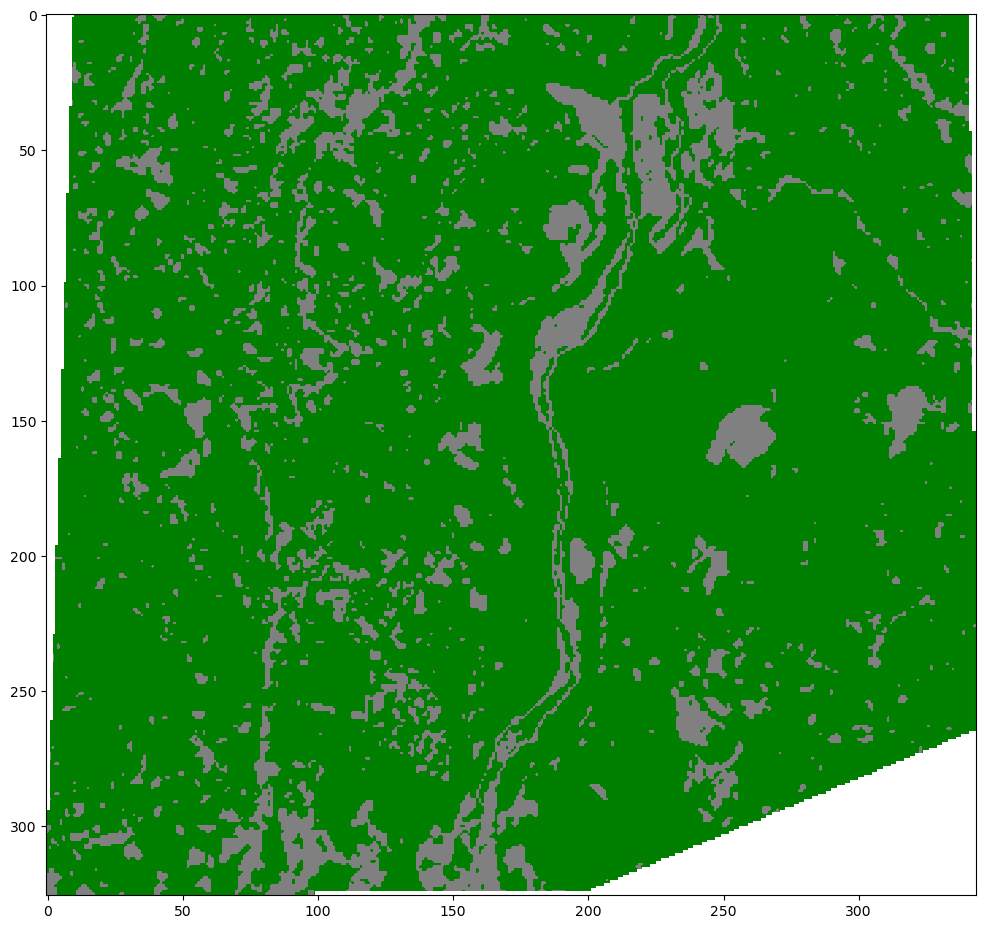

In [48]:
# Define color map
nbr_colors = ["gray", "g"]
nbr_cmap = ListedColormap(nbr_colors)

# Define class names
ndvi_cat_names = [
    "No Vegetation",
    "Vegetation",
    "Water",
]

# Get list of classes
classes = np.unique(ndvi_landsat_class)
classes = classes.tolist()
# The mask returns a value of none in the classes. remove that
classes = classes[0:2]

# Plot your data
fig, ax = plt.subplots(figsize=(12, 12))
im = ax.imshow(ndvi_landsat_class, cmap=nbr_cmap)

ep.draw_legend(im_ax=im, classes=classes, titles=ndvi_cat_names)
ax.set_title(
    "Landsat 8 - Normalized Difference Vegetation Index (NDVI) Classes",
    fontsize=14,
)
ax.set_axis_off()

# Auto adjust subplot to fit figure size
plt.tight_layout()

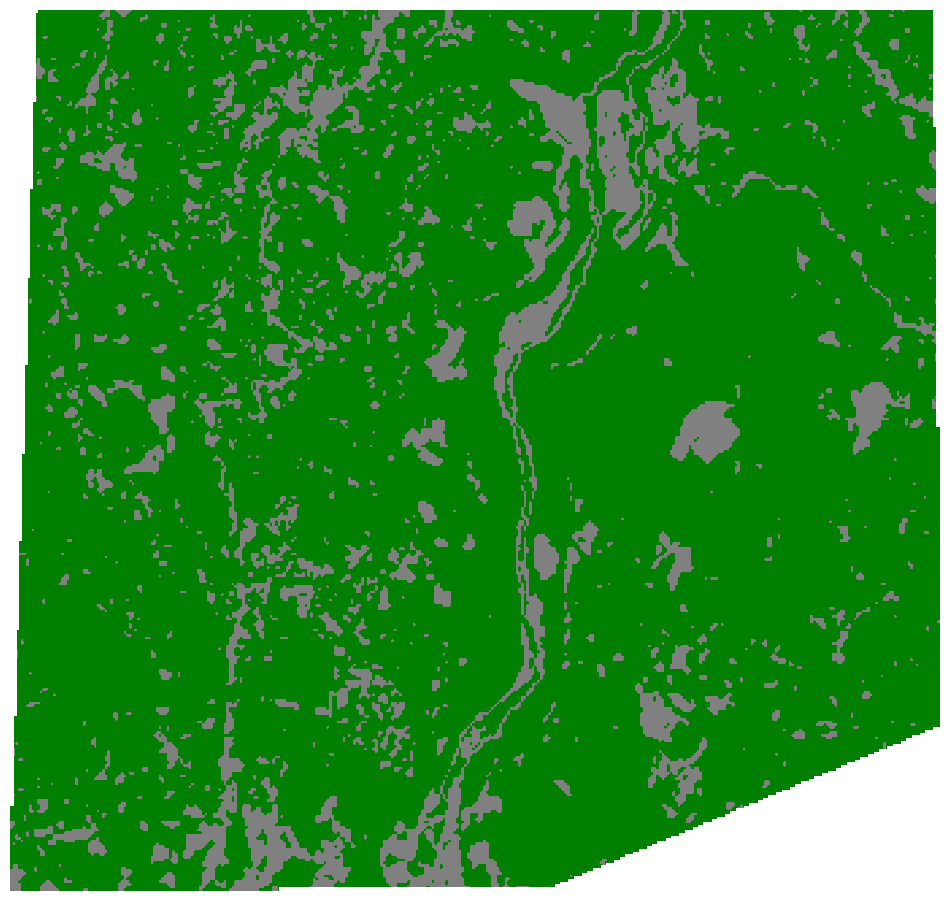

In [49]:
#from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
#from matplotlib.figure import Figure

fig, ax = plt.subplots(figsize=(12, 12))
im = ax.imshow(ndvi_landsat_class, cmap=nbr_cmap)
ax.set_axis_off()
canvas = plt.gca().figure.canvas
canvas.draw()
data = np.frombuffer(canvas.tostring_rgb(), dtype=np.uint8)
image = data.reshape(canvas.get_width_height()[::-1] + (3,))